In [1]:
using Plots
using LinearAlgebra
using NLsolve
using Statistics
using NPZ

In [187]:
include("../src/axion_trajs_out.jl")

test_runner (generic function with 1 method)

In [188]:
Mass_a = 1e-6;
θm = 0.2;
ωPul = 1.0;
B0 = 1e14;
rNS = 10;
t_in = 0;
NS_vel = [0 0 200.0] ./ 2.998e5;
ln_tend = 20
threshold = 0.0001
phiVs=30
thetaVs=30
sve=true;
#xx, vv = test_runner(Mass_a, θm, ωPul, B0, rNS, t_in, NS_vel; indx=3000, nsteps=1000, ln_tstart=-10, ln_tend=20, ode_err=1e-4)
if sve
    main_runner(Mass_a, θm, ωPul, B0, rNS, t_in, NS_vel; nsteps=10, ln_tstart=-15, ln_tend=ln_tend, ode_err=1e-10, phiVs=phiVs, thetaVs=thetaVs, threshold=threshold, sve=sve);
else
    fileTail = "PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.0_rotPulsar_1.0_B0_1.0e14_rNS_Time_0_sec_NS_velZ_0.0007_.npz";
    fileName = "temp_storage/FinalX_"*fileTail;
    finalX = npzread(fileName);
    fileName = "temp_storage/FinalV_"*fileTail;
    finalV = npzread(fileName);
    fileName = "temp_storage/SurfaceX_"*fileTail;
    SurfaceX = npzread(fileName);
    fileName = "temp_storage/SurfaceV_"*fileTail;
    SurfaceV = npzread(fileName);
    fileName = "temp_storage/dkdz_"*fileTail;
    dkdl = npzread(fileName);
    fileName = "temp_storage/ctheta_"*fileTail;
    ctheta = npzread(fileName);

#    SurfaceX, SurfaceV, finalX, finalV, dkdl, ctheta = main_runner(Mass_a, θm, ωPul, B0, rNS, t_in, NS_vel; nsteps=10, ln_tstart=-15, ln_tend=ln_tend, ode_err=1e-10, phiVs=phiVs, thetaVs=thetaVs, threshold=threshold, sve=sve);
end

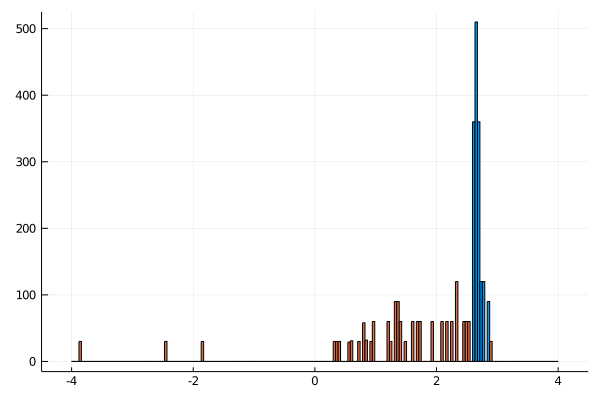

In [190]:
rr = sqrt.(sum(SurfaceX.^2, dims=2))
vv = sqrt.(sum(SurfaceV.^2, dims=2))
dkdlBen = 3 .* 1e-6 ./ (2 .* rr .* vv .* 2.998e5) ./ 6.58e-16
nbins=LinRange(-4, 4, 200)

histogram()
histogram!(log10.(dkdlBen), nbins=nbins)
histogram!(log10.(dkdl .* ctheta), bins=nbins, legend=false)


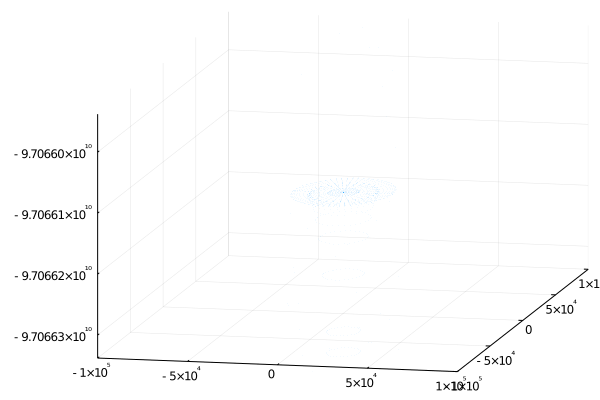

In [191]:
gr(format="png")
maxVZ = minimum(finalX[:,3])
maxVY = maximum(finalX[:,2])
maxVX = maximum(finalX[:,1])

medianZ = Statistics.median(finalX[:, 3])
stdZ = Statistics.std(finalX[:, 3])
#scatter(finalX[:,1], finalX[:,2], finalX[:,3], markersize=4, camera=(40,50),zlims=(-maxVZ,maxVZ), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)

# #surface!(finalX[finalX[:,3].>0,1], finalX[finalX[:,3].>0,2], finalX[finalX[:,3].>0,3], zlims=(-maxVZ,maxVZ))
# #surface!(camera=(20,20))

# n=40
# phi = 0:pi/50:2*pi;
# theta = 0:pi/100:pi;
# radi = 1e-4 # pc

# x = radi .* 3.086e+13 .* [cos(t)*sin(p) for t in theta, p in phi];
# y =  radi .* 3.086e+13 .*  [sin(t)*sin(p) for t in theta, p in phi] .+ 7e10;
# z =  radi .* 3.086e+13 .* [cos(p) for t in theta, p in phi] .- 9e10;

# plot!(x,y,z, legend=false, color=:blue)
limS = 5*stdZ
dist = 1e5
surface()
scatter!(finalX[:,1], finalX[:,2], finalX[:,3], markersize=1, markeralpha=0.05, zlims=(medianZ-dist*2,medianZ+dist*2), xlims=(-dist, dist),ylims=(-dist, dist), legend=false)
surface!(camera=(20,40))


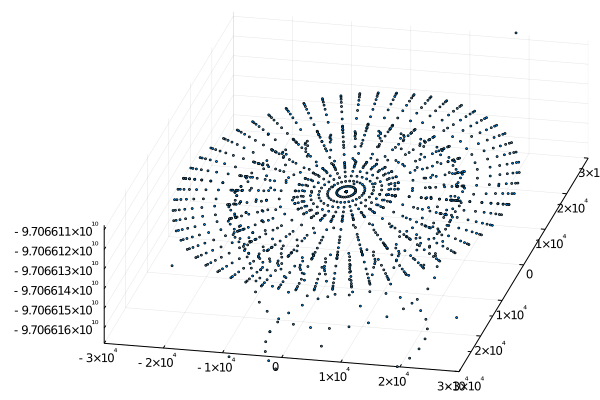

In [192]:
gr(format="png")
maxVZ = minimum(finalX[:,3])
maxVY = maximum(finalX[:,2])
maxVX = maximum(finalX[:,1])

medianZ = Statistics.median(finalX[:, 3])
stdZ = Statistics.std(finalX[:, 3])
#scatter(finalX[:,1], finalX[:,2], finalX[:,3], markersize=4, camera=(40,50),zlims=(-maxVZ,maxVZ), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)

# #surface!(finalX[finalX[:,3].>0,1], finalX[finalX[:,3].>0,2], finalX[finalX[:,3].>0,3], zlims=(-maxVZ,maxVZ))
# #surface!(camera=(20,20))

# n=40
# phi = 0:pi/50:2*pi;
# theta = 0:pi/100:pi;
# radi = 1e-4 # pc

# x = radi .* 3.086e+13 .* [cos(t)*sin(p) for t in theta, p in phi];
# y =  radi .* 3.086e+13 .*  [sin(t)*sin(p) for t in theta, p in phi] .+ 7e10;
# z =  radi .* 3.086e+13 .* [cos(p) for t in theta, p in phi] .- 9e10;

# plot!(x,y,z, legend=false, color=:blue)
limS = 5*stdZ
dist = 3e4
surface()
scatter!(finalX[:,1], finalX[:,2], finalX[:,3], markersize=1.3, zlims=(medianZ-dist,medianZ+dist), xlims=(-dist, dist),ylims=(-dist, dist), legend=false)
surface!(camera=(20,70))


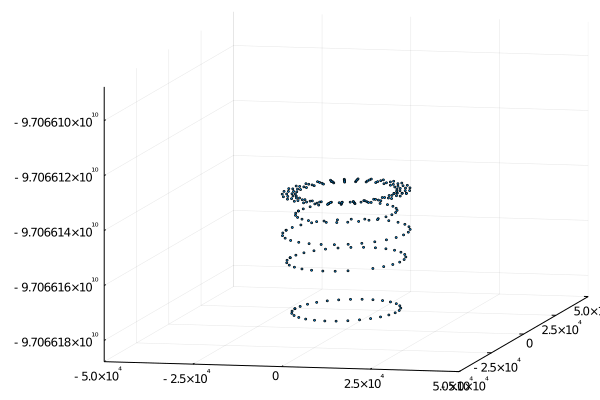

In [193]:
gr(format="png")
maxVZ = minimum(finalX[:,3])
maxVY = maximum(finalX[:,2])
maxVX = maximum(finalX[:,1])

medianZ = Statistics.median(finalX[:, 3])
stdZ = Statistics.std(finalX[:, 3])

rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
thresh = 1.3e4
thresh2 = 1.7e4
highlightx = [finalX[i, 1] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [finalX[i, 2] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [finalX[i, 3] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];

limS = 5*stdZ
dist = 5e4
surface()
scatter!(highlightx, highlighty, highlightz, markersize=1.3, zlims=(medianZ-dist,medianZ+dist), xlims=(-dist, dist),ylims=(-dist, dist), legend=false)
surface!(camera=(20,30))


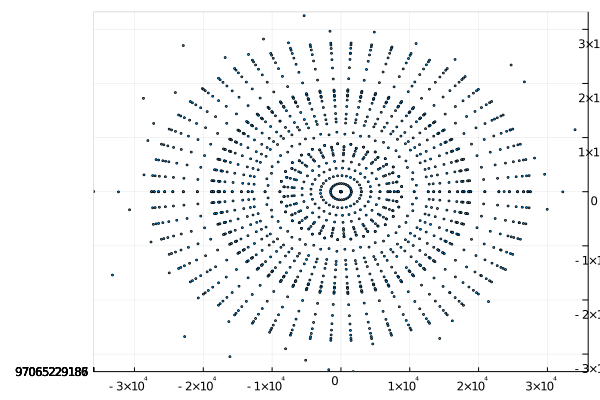

In [194]:
gr(format="png")
maxVZ = maximum(finalX[:,3])
maxVY = maximum(abs.(finalX[:,2]))
maxVX = maximum(abs.(finalX[:,1]))
scatter()
scatter!(finalX[:,1], finalX[:,2], finalX[:,3], markersize=2, zlims=(-maxVZ, 10), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
scatter!(camera=(0,90))
#scatter!(camera=(0,90))
#surface(finalX[:,1], finalX[:,2], finalX[:,3])

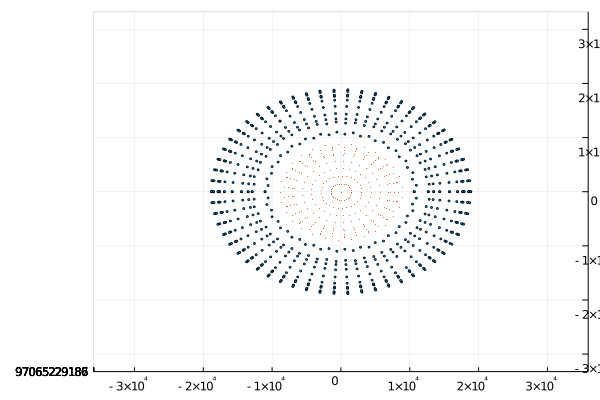

In [195]:
gr(format="png")
maxVZ = maximum(finalX[:,3])
maxVY = maximum(abs.(finalX[:,2]))
maxVX = maximum(abs.(finalX[:,1]))

rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
thresh = 1e4
thresh2 = 2e4
highlightx = [finalX[i, 1] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [finalX[i, 2] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [finalX[i, 3] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightx2 = [finalX[i, 1] for i in 1:length(finalX[:,1]) if (rho[i].<thresh)&&(rho[i].<thresh2)];
highlighty2 = [finalX[i, 2] for i in 1:length(finalX[:,1]) if (rho[i].<thresh)&&(rho[i].<thresh2)];
highlightz2 = [finalX[i, 3] for i in 1:length(finalX[:,1]) if (rho[i].<thresh)&&(rho[i].<thresh2)];

scatter()
scatter!(highlightx, highlighty,highlightz, markersize=1.5, zlims=(-maxVZ, 10), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
scatter!(highlightx2, highlighty2,highlightz2, markersize=1, zlims=(-maxVZ, 10), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
scatter!(camera=(0,90))
#scatter!(camera=(0,90))
#surface(finalX[:,1], finalX[:,2], finalX[:,3])

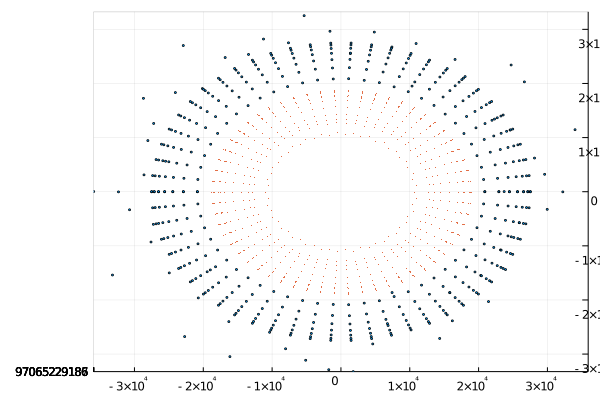

In [196]:
gr(format="png")
maxVZ = maximum(finalX[:,3])
maxVY = maximum(abs.(finalX[:,2]))
maxVX = maximum(abs.(finalX[:,1]))

rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
thresh0 = 1e4
thresh = 2e4
thresh2 = 5e4
highlightx = [finalX[i, 1] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [finalX[i, 2] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [finalX[i, 3] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightx2 = [finalX[i, 1] for i in 1:length(finalX[:,1]) if (rho[i].>thresh0)&&(rho[i].<thresh)];
highlighty2 = [finalX[i, 2] for i in 1:length(finalX[:,1]) if (rho[i].>thresh0)&&(rho[i].<thresh)];
highlightz2 = [finalX[i, 3] for i in 1:length(finalX[:,1]) if (rho[i].>thresh0)&&(rho[i].<thresh)];

scatter()
scatter!(highlightx, highlighty,highlightz, markersize=1.5, zlims=(-maxVZ, 10), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
scatter!(highlightx2, highlighty2,highlightz2, markersize=1, zlims=(-maxVZ, 10), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
scatter!(camera=(0,90))
#scatter!(camera=(0,90))
#surface(finalX[:,1], finalX[:,2], finalX[:,3])

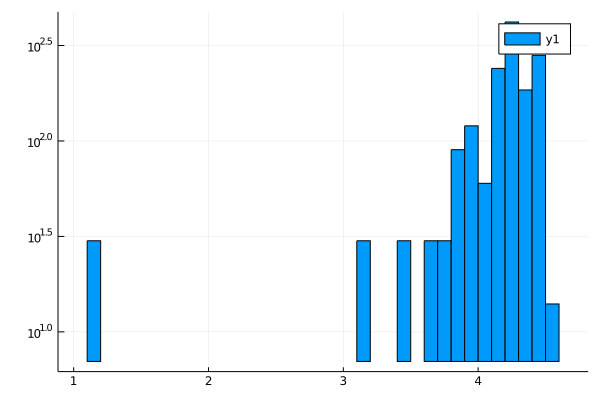

In [197]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
histogram(log10.(rho), yaxis = (:log10))

In [198]:
θ = LinRange(-0.003, π+0.003, 100)
ϕ = LinRange(0.0 , 2*π , 100)
Csurf = zeros(length(θ))
x0CS_f2 = zeros(length(θ) * length(ϕ), 3)
rL = 10 .^ LinRange(log10.(10), 3, 5000)
MagnetoVars = [θm, ωPul, B0, rNS, t_in] # θm, ωPul, B0, rNS, gamma factors
cnt = 1
for i in 1:length(θ)
    for j in 1:length(ϕ)
        x0CS = [rL .* sin.(θ[i]) .* cos.(ϕ[j]) rL .* sin.(θ[i]) .* sin.(ϕ[j]) rL .* cos.(θ[i])];
        ωpL = RayTracer.GJ_Model_ωp_vec(x0CS, t_in, MagnetoVars[1], MagnetoVars[2], MagnetoVars[3], MagnetoVars[4])
        cx_list = RayTracer.get_crossings(log10.(ωpL) .- log10.(1e-6))
        cross = RayTracer.apply(cx_list, rL)
        if length(cx_list.i1) != 0
            Csurf[i] = cross[1]
        else
            Csurf[i] = 0.0
        end
        x0CS_f2[cnt,:] =[Csurf[i] .* sin.(θ[i]) .* cos.(ϕ[j]) Csurf[i] .* sin.(θ[i]) .* sin.(ϕ[j]) Csurf[i] .* cos.(θ[i])];
        cnt += 1
    end
end

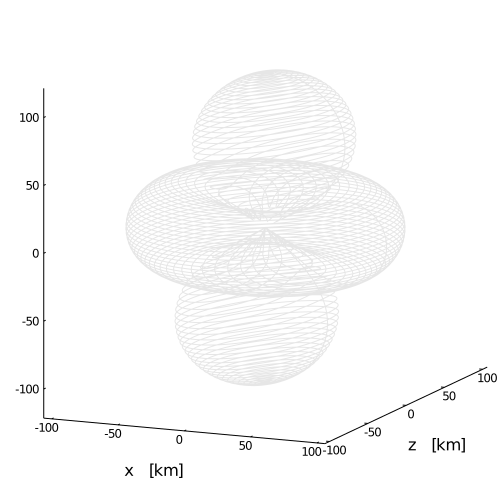

In [199]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100
highlight = SurfaceX[rho[:] .> 1e8, :];
scatter(highlight[:,1], highlight[:,2], highlight[:,3], markersize=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=false, xlims=[-scale,scale], ylim=[-scale,scale])

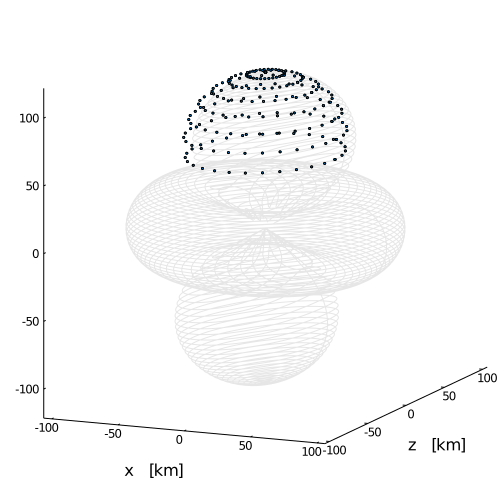

In [200]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100

thresh = 1.89e4
thresh2 = 5e4
highlightx = [SurfaceX[i, 1] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [SurfaceX[i, 2] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [SurfaceX[i, 3] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
plot()
scatter(highlightx, highlighty, highlightz, markersize=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=false, xlims=[-scale,scale], ylim=[-scale,scale])

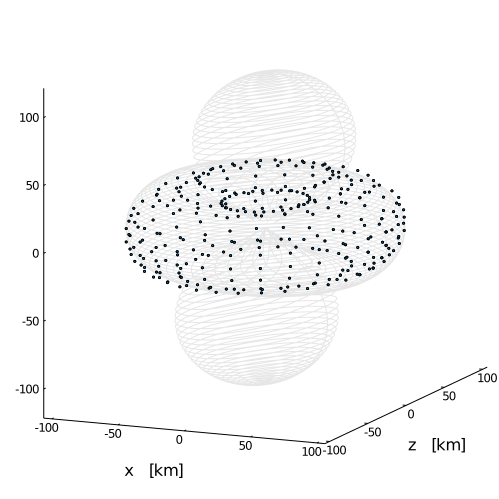

In [201]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100

thresh = 1.e4
thresh2 = 1.88e4
highlightx = [SurfaceX[i, 1] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [SurfaceX[i, 2] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [SurfaceX[i, 3] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
plot()
scatter(highlightx, highlighty, highlightz, markersize=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=false, xlims=[-scale,scale], ylim=[-scale,scale])

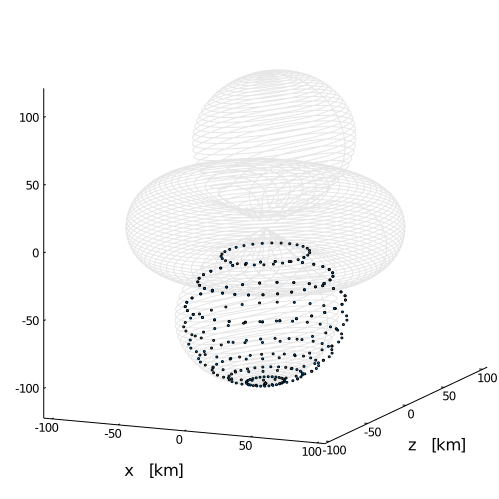

In [202]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100

thresh = 1
thresh2 = 1e4
highlightx = [SurfaceX[i, 1] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [SurfaceX[i, 2] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [SurfaceX[i, 3] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
plot()
scatter(highlightx, highlighty, highlightz, markersize=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=false, xlims=[-scale,scale], ylim=[-scale,scale])

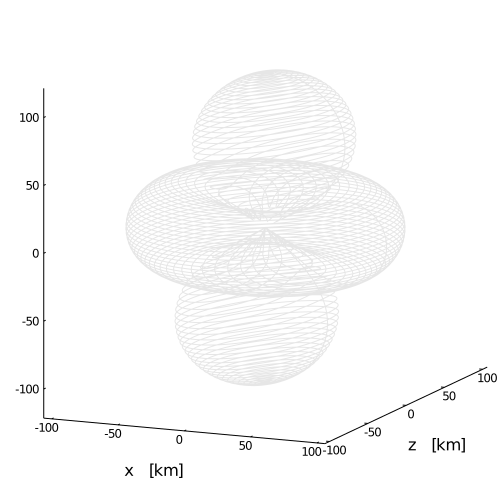

In [203]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100

thresh = 1.6e4
thresh2 = 1.65e4
highlightx = [SurfaceX[i, 1] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [SurfaceX[i, 2] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [SurfaceX[i, 3] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
plot()
scatter(highlightx, highlighty, highlightz, markersize=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=false, xlims=[-scale,scale], ylim=[-scale,scale])

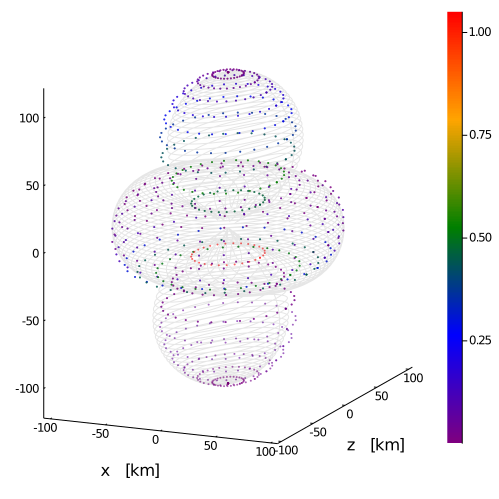

In [204]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100

thresh = 1
thresh2 = 1e4
highlightx = [SurfaceX[i, 1] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [SurfaceX[i, 2] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [SurfaceX[i, 3] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
plot()

rr = sqrt.(sum(SurfaceX.^2, dims=2))
vv = sqrt.(sum(SurfaceV.^2, dims=2))
dkdlBen = 3 .* 1e-6 ./ (2 .* rr .* vv .* 2.998e5) ./ 6.58e-16
colorS = (dkdl .* ctheta ./ dkdlBen)
scatter(SurfaceX[:, 1], SurfaceX[:, 2], SurfaceX[:,3], markersize=2, markeralpha=0.6,markerstrokewidth=0, markerstrokealpha = 0.0, mc=:rainbow, mz=colorS)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=false, xlims=[-scale,scale], ylim=[-scale,scale])

In [856]:
xx, vv = test_runner(Mass_a, θm, ωPul, B0, rNS, t_in, NS_vel; indx=2345, nsteps=1000, ln_tstart=-10, ln_tend=20, ode_err=1e-4);

In [886]:
θ = LinRange(-0.003, π+0.003, 100)
ϕ = π
Csurf = zeros(length(θ))
x0CS_f2 = zeros(length(θ), 3)
rL = 10 .^ LinRange(log10.(10), 4, 10000)
MagnetoVars = [θm, ωPul, B0, rNS, t_in] # θm, ωPul, B0, rNS, gamma factors
for i in 1:length(θ)
    x0CS = [rL .* sin.(θ[i]) .* cos.(ϕ) rL .* sin.(θ[i]) .* sin.(ϕ) rL .* cos.(θ[i])];
    ωpL = RayTracer.GJ_Model_ωp_vec(x0CS, t_in, MagnetoVars[1], MagnetoVars[2], MagnetoVars[3], MagnetoVars[4])
    cx_list = RayTracer.get_crossings(log10.(ωpL) .- log10.(1e-6))
    cross = RayTracer.apply(cx_list, rL)
    if length(cx_list.i1) != 0
        Csurf[i] = cross[1]
    else
        Csurf[i] = 10.0
    end
    x0CS_f2[i,:] =[Csurf[i] .* sin.(θ[i]) .* cos.(ϕ) Csurf[i] .* sin.(θ[i]) .* sin.(ϕ) Csurf[i] .* cos.(θ[i])];
end

#plot!(x0CS_f[:, 1], x0CS_f[:, 3], lw=2, c=:black, xlims=[-200,200],ylims=[-200, 200], fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="ρ   [km]")
#plot!(x0CS_f2[:, 1], x0CS_f2[:, 3], lw=2, c=:black, xlims=[-200,200],ylims=[-200, 200], fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")

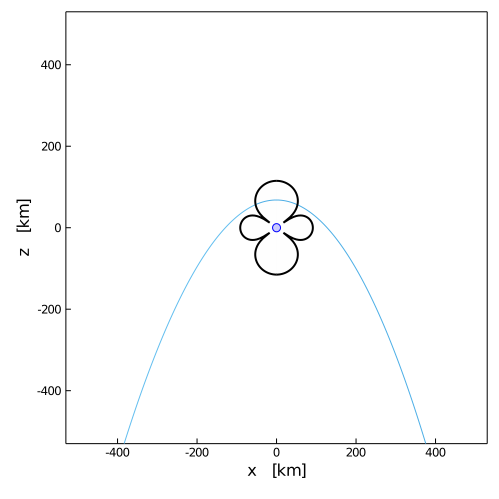

In [858]:
function circleShape(h, k, r)
    th = LinRange(0, 2*π, 500)
    h .+ r*sin.(th), k .+ r*cos.(th)
end

plot(framestyle=:box, palette=:default)
plot!(xx[1,1,:], xx[1,3,:],legend=false, palette=:cmyk)
plot!(xx[2,1,:], xx[2,3,:],legend=false, palette=:cmyk)
plot!(circleShape(0, 0, 10), seriestype=[:shape, ], lw = 1, c =:blue, linecolor=:blue,legend=false,fillalpha=0.2 )
scale = 500
#scale = 100000
#plot!([0], seriestype="vline", c =:black, lw=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(-x0CS_f2[:, 1], x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=false, xlims=[-scale,scale], ylim=[-scale,scale])

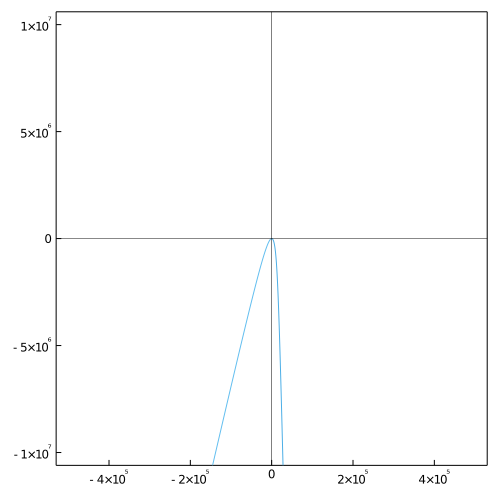

In [859]:
plot(framestyle=:box, palette=:default)
plot!(xx[1,1,:], xx[1,3,:],legend=false, palette=:cmyk)
plot!(xx[2,1,:], xx[2,3,:],legend=false, palette=:cmyk)
plot!(circleShape(0, 0, 10), seriestype=[:shape, ], lw = 5, c =:blue, linecolor=:blue,legend=false,fillalpha=0.2 )
scale = 1e7

plot!([0], seriestype="vline", c =:black, lw=.5)
plot!([0], seriestype="hline", c =:black, lw=.5)
plot!(size=(500,500), grid=false, xlims=[-5e5,5e5], ylim=[-scale,scale])

In [860]:
vv[2,:,end] * 2.998e5

3-element Array{Float64,1}:
   2.4124090031812377
  -0.8719788612408637
 200.16842841766558

In [489]:
gr(format="png")
maxVZ = maximum(finalX[:,3])
maxVY = maximum(finalX[:,2])
maxVX = maximum(finalX[:,1])
include("polyharmonic_spline.jl") 

n=20
xgrid = ones(n)*range(-1e11,stop=1e11,length=n)'
ygrid = range(-1e11,stop=1e11,length=n)*ones(n)'

zgrid = S2.(xgrid,ygrid)
S2 = PolyharmonicSpline(2,[x y],z)
plot_surface(xgrid,ygrid,zgrid,alpha=0.5)
#scatter(finalX[:,1], finalX[:,2], finalX[:,3], markersize=4, camera=(40,50),zlims=(-maxVZ,maxVZ), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
#surface(finalX[finalX[:,3].<0,1], finalX[finalX[:,3].<0,2], finalX[finalX[:,3].<0,3])
#scatter3D(x,y,z,color="r")
show()

ErrorException: could not open file /Users/samuelwitte/Desktop/Magnetized_Plasma/Axion_Infall/notebooks/polyharmonic_spline.jl

In [187]:
xx[1,:,end]

3-element Array{Float64,1}:
 -20244.086893021595
     -1.7303344174464013
     -1.7981236460685256e9

In [189]:
sqrt.(sum(xx[2,:,:].^2, dims=1))

1×100 Array{Float64,2}:
 44.3601  44.9198  45.6933  46.7669  …  5.29933e10  7.17406e10  9.71233e10

In [190]:
sqrt.(sum(xx[1,:,:].^2, dims=1))

1×100 Array{Float64,2}:
 44.3601  43.8108  43.085  42.1377  …  5.29933e10  7.17406e10  9.71232e10

In [191]:
sqrt.(sum(vv[2,:,:].^2, dims=1)) .* 2.998e5

1×100 Array{Float64,2}:
 77348.6  76865.2  76211.9  75332.0  …  200.135  200.13  200.127  200.125

In [192]:
sqrt.(sum(vv[1,:,:].^2, dims=1)) .* 2.998e5

1×100 Array{Float64,2}:
 77348.6  77831.9  78484.8  79362.1  …  200.135  200.13  200.127  200.124

In [222]:
LinRange(0.05 , π - 0.01, 3)

3-element LinRange{Float64}:
 0.05,1.5908,3.13159